In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [59]:
elevation_file="../Major_reservoirs/MergedReservoirData_10-01-1990T02-01-2020.csv"
population_file="../Resources_pop/basinstates_popgrowth.csv"


In [60]:
df=pd.read_csv(elevation_file,parse_dates=["Date"])
pop_df=pd.read_csv(population_file,encoding='utf-8')
df["Year"]=df["Date"].dt.strftime('%Y')
MaxElevations = []
for column in df.columns:
    MaxElevations.append(df[column].max())
MaxElevations = [MaxElevations[1],MaxElevations[2],MaxElevations[3],MaxElevations[4],MaxElevations[5],MaxElevations[6],MaxElevations[7]]


In [18]:
MaxElevations

[7519.21, 6037.59, 6506.25, 3696.27, 7160.84, 6082.52, 7602.51]

In [22]:
df=df.groupby(["Year"]).mean()

In [23]:
df.reset_index()

,Year,Blue Mesa Elevation (feet),Flaming Gorge Elevation (feet),Fontenelle Elevation (feet),Lake Powell Elevation (feet),Morrow Point Elevation (feet),Navajo Elevation (feet),Strawberry Elevation (feet)
0,1990,7497.363333,6022.353333,6490.106667,3635.703333,7154.913333,6063.243333,7559.416667
1,1991,7502.855000,6027.630833,6488.685833,3630.016667,7155.226667,6072.557500,7559.988333
2,1992,7491.435833,6026.085000,6478.785833,3623.552500,7154.015833,6076.717500,7555.978333
3,1993,7496.347500,6027.758333,6488.965833,3646.449167,7155.752500,6075.710833,7557.064167
4,1994,7494.658333,6022.157500,6484.311667,3656.388333,7152.854167,6071.435000,7560.047500
5,1995,7497.515833,6025.427500,6485.300000,3670.261667,7151.202500,6071.157500,7568.250000
6,1996,7496.709167,6027.565833,6484.788333,3678.833333,7152.061667,6057.708333,7581.438333
7,1997,7492.542500,6030.463333,6489.824167,3680.806667,7151.859167,6065.438333,7592.955833
8,1998,7488.736667,6031.385000,6489.660000,3684.832500,7152.577500,6068.444167,7598.025000
9,1999,7498.701667,6029.333333,6489.555000,3685.330000,7154.009167,6071.450833,7594.648333


In [6]:
df_list=df.columns
df_list

Index(['Blue Mesa Elevation (feet)', 'Flaming Gorge Elevation (feet)',
       'Fontenelle Elevation (feet)', 'Lake Powell Elevation (feet)',
       'Morrow Point Elevation (feet)', 'Navajo Elevation (feet)',
       'Strawberry Elevation (feet)'],
      dtype='object')

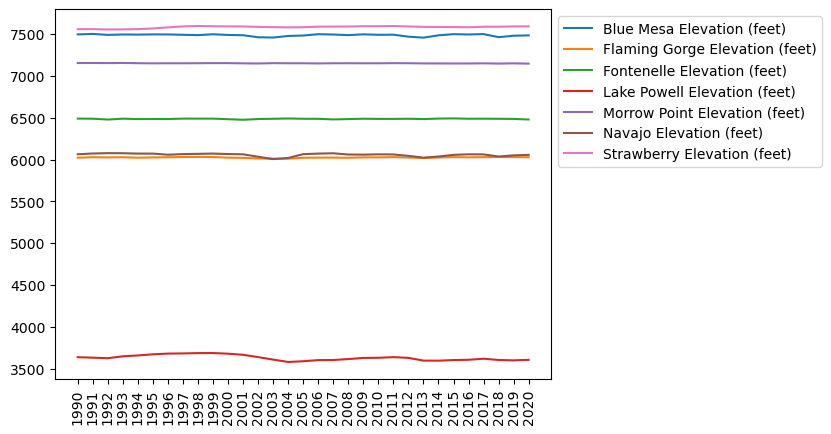

In [7]:
plt.plot(df,label=df_list)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [43]:
#In order to better analyze the data, we need to convert it into a percentage of the maximum elevation over the period
percentage_df = pd.DataFrame({"Blue Mesa Elevation Percentage":df["Blue Mesa Elevation (feet)"]/MaxElevations[0],"Flaming Gorge Elevation Percentage":df["Flaming Gorge Elevation (feet)"]/MaxElevations[1],"Fontanelle Elevation Percentage":df["Fontenelle Elevation (feet)"]/MaxElevations[2],"Lake Powell Elevation Percentage":df["Lake Powell Elevation (feet)"]/MaxElevations[3],"Morrow Point Elevation Percentage":df["Morrow Point Elevation (feet)"]/MaxElevations[4],"Navajo Elevation Percentage":df["Navajo Elevation (feet)"]/MaxElevations[5],"Strawberry Elevation Percentage":df["Strawberry Elevation (feet)"]/MaxElevations[6]})

percentage_df.style.format({
    "Blue Mesa Elevation Percentage": '{:,.2%}'.format,
    "Flaming Gorge Elevation Percentage": '{:,.2%}'.format,
    "Fontanelle Elevation Percentage": '{:,.2%}'.format,
    "Lake Powell Elevation Percentage": '{:,.2%}'.format,
    "Morrow Point Elevation Percentage": '{:,.2%}'.format,
    "Navajo Elevation Percentage": '{:,.2%}'.format,
    "Strawberry Elevation Percentage": '{:,.2%}'.format,
    })

,Blue Mesa Elevation Percentage,Flaming Gorge Elevation Percentage,Fontanelle Elevation Percentage,Lake Powell Elevation Percentage,Morrow Point Elevation Percentage,Navajo Elevation Percentage,Strawberry Elevation Percentage
Year,,,,,,,
1990,99.71%,99.75%,99.75%,98.36%,99.92%,99.68%,99.43%
1991,99.78%,99.84%,99.73%,98.21%,99.92%,99.84%,99.44%
1992,99.63%,99.81%,99.58%,98.03%,99.90%,99.90%,99.39%
1993,99.70%,99.84%,99.73%,98.65%,99.93%,99.89%,99.40%
1994,99.67%,99.74%,99.66%,98.92%,99.89%,99.82%,99.44%
1995,99.71%,99.80%,99.68%,99.30%,99.87%,99.81%,99.55%
1996,99.70%,99.83%,99.67%,99.53%,99.88%,99.59%,99.72%
1997,99.65%,99.88%,99.75%,99.58%,99.87%,99.72%,99.87%
1998,99.59%,99.90%,99.75%,99.69%,99.88%,99.77%,99.94%


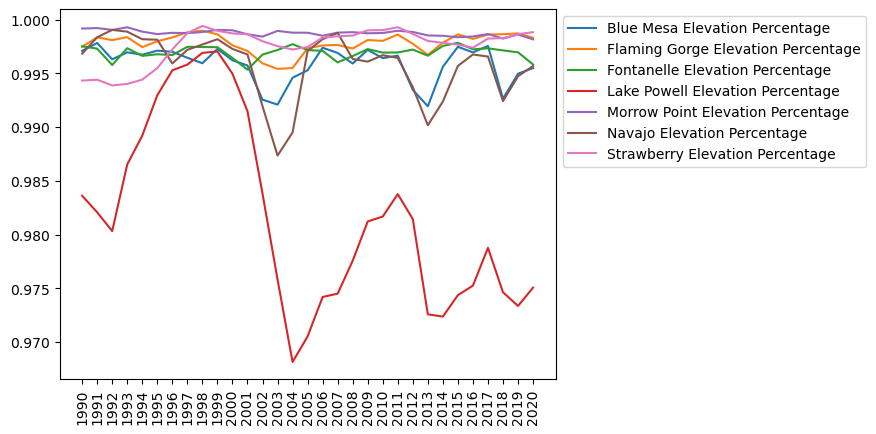

In [45]:
plt.plot(percentage_df,label=percentage_df.columns)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [78]:
#Now to see if there is any correlation between the lake elevations over the period and the population of the region
#population_vs_elevation_df = pd.DataFrame({})
basin_population_sum = [pop_df['1990'].sum(),pop_df['2000'].sum(),pop_df['2010'].sum(),pop_df['2020'].sum()]
percentage_decennial_mean = []

for i in range(4):
    decennial_percentages = []
    for j in range(7): 
        decennial_percentages.append(percentage_df[percentage_df.columns[j]][10*i])
    percentage_decennial_mean.append(np.average(decennial_percentages))
percentage_decennial_mean

[0.9951483832965138,
 0.9971756317714513,
 0.9953614719049017,
 0.9939113145415173]

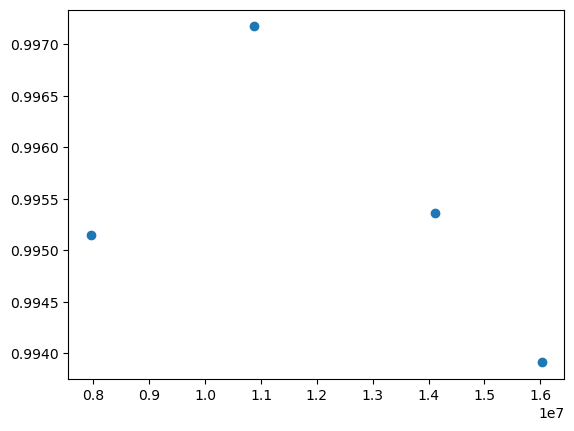

In [82]:
population_vs_elevation_df = pd.DataFrame({"Year":[1990,2000,2010,2020],"Total Population of Basin Counties":basin_population_sum,"Mean Reservoir Percentage Filled":percentage_decennial_mean})

plt.scatter(population_vs_elevation_df["Total Population of Basin Counties"],population_vs_elevation_df["Mean Reservoir Percentage Filled"])